In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
import nltk
from nltk.stem import *
from nltk.tag import *
from nltk import *
from nltk.tokenize import *
%pylab inline

pd.set_option('display.max_columns', 999)
pd.set_option('display.column_space', 50)

set_matplotlib_formats('retina')
plt.style.use('ggplot')


Populating the interactive namespace from numpy and matplotlib


/Users/Haebichan/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test', 'stem', 'load', 'choose', 'draw', 'text', 'entropy', 'Text', 'find', 'xticks', 'flatten', 'figure']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [44]:
df = pd.read_table('train.tsv')

In [45]:
train = df.copy()

In [46]:
test = pd.read_table('test.tsv')

In [47]:
# df = df.iloc[:,2:]

In [48]:
df.columns = df.columns.str.lower()

In [49]:
df.phrase[0]

'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

In [50]:
print(df.sentiment.isnull().sum())
print(df.phrase.isnull().sum())

0
0


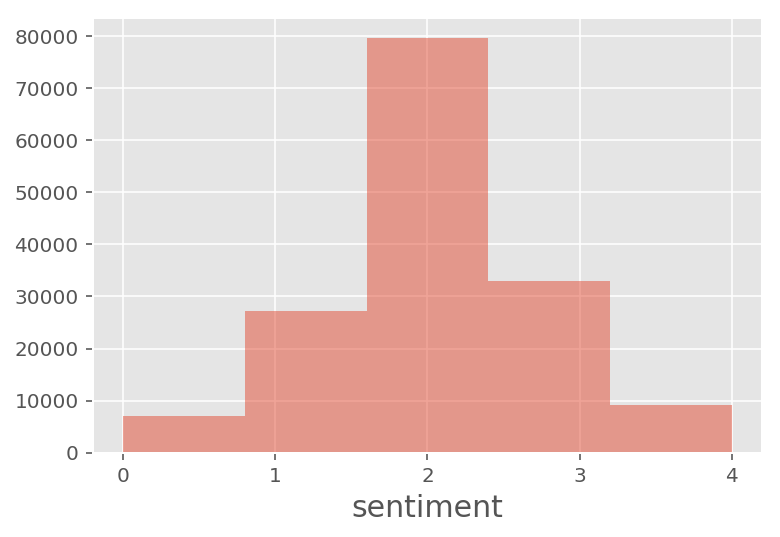

In [51]:
hist(df.sentiment, bins = 5, alpha = 0.5);
xticks(range(5));
xlabel('sentiment', fontsize = 15);

#sentiment histogram showing a normal distribution of the user ratings

In [52]:
len(df)

156060

In [53]:
df['review_word_length'] = df.phrase.apply(lambda x: len(word_tokenize(x)))

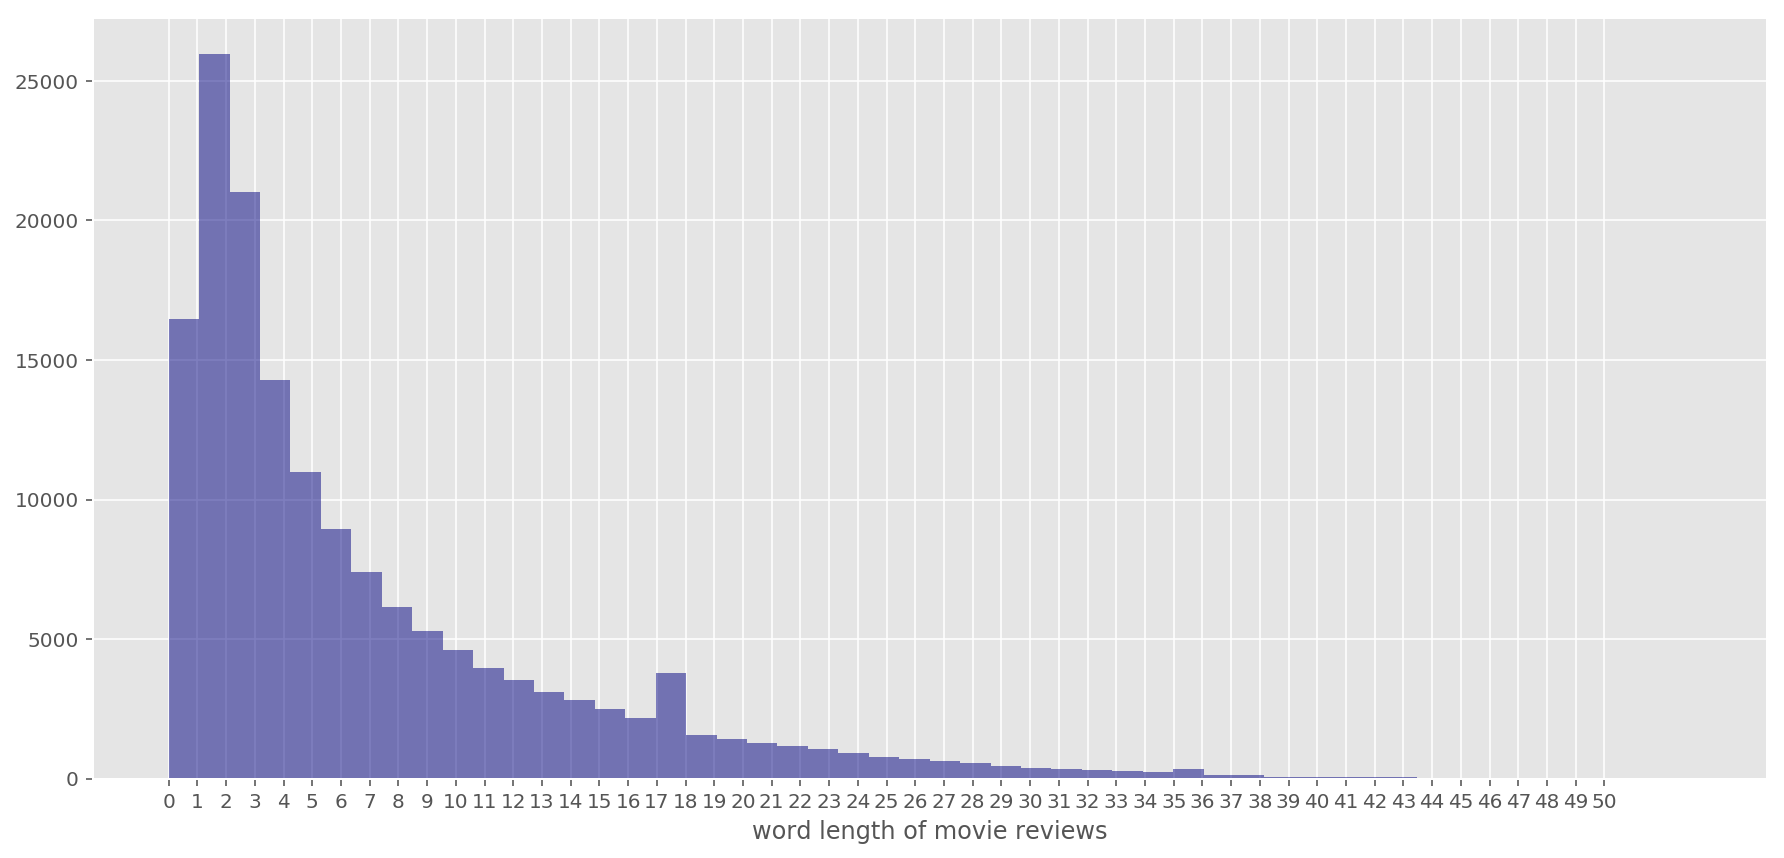

In [54]:
figure = figsize(15,7)
hist(df.review_word_length, bins = 50, color = 'navy', alpha = 0.5)
xticks(range(51));
xlabel('word length of movie reviews');

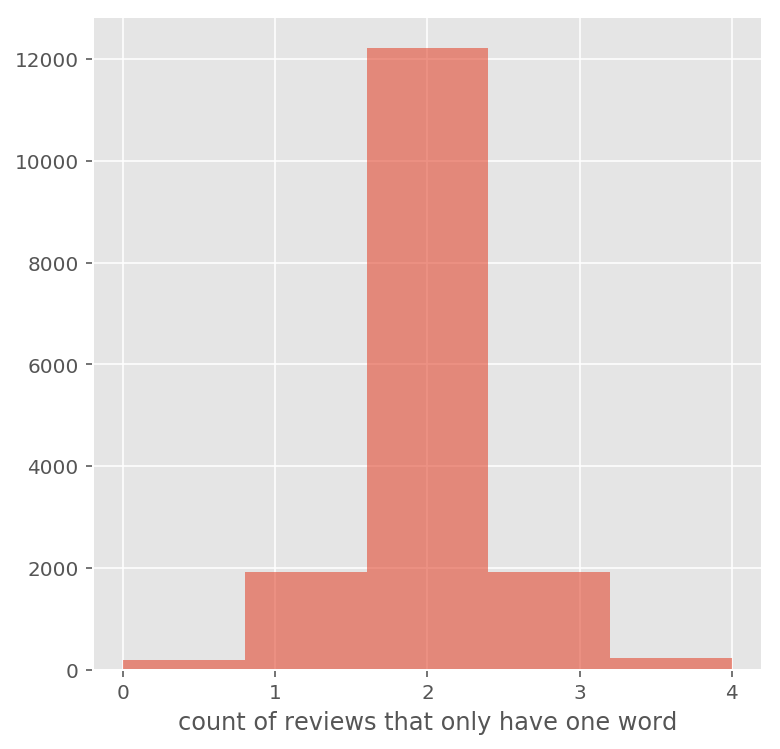

In [55]:
figure = figsize(6,6);
hist(df[df.review_word_length == 1].sentiment, bins = 5, alpha = 0.6);
xticks(range(5));
xlabel('count of reviews that only have one word');

In [56]:
df[df.review_word_length == 3].head(7)

,phraseid,sentenceid,phrase,sentiment,review_word_length
10,11,1,demonstrating the adage,2,3
23,24,1,for the goose,2,3
34,35,1,"the gander ,",2,3
39,40,1,some of which,2,3
59,60,1,of a story,2,3
70,71,2,introspective and entertaining,3,3
77,78,2,is worth seeking,4,3


In [57]:
df.loc[10]

phraseid                                   11
sentenceid                                  1
phrase                demonstrating the adage
sentiment                                   2
review_word_length                          3
Name: 10, dtype: object

In [58]:
df[df.review_word_length == 4].head(7)

,phraseid,sentenceid,phrase,sentiment,review_word_length
21,22,1,good for the goose,3,4
57,58,1,much of a story,2,4
69,70,2,", introspective and entertaining",3,4
76,77,2,is worth seeking .,3,4
87,88,3,Ismail Merchant 's work,2,4
95,96,3,", I suspect ,",2,4
110,111,3,sitting through this one,1,4


In [59]:
# can start to see weird repetition in the phrases 

for i in range(10):
    print(df[df.review_word_length == i].head(5))
    print('__________________________________________________________________________')

      phraseid  sentenceid phrase  sentiment  review_word_length
2005      2006          76                 1                   0
__________________________________________________________________________
    phraseid  sentenceid         phrase  sentiment  review_word_length
3          4           1              A          2                   1
4          5           1         series          2                   1
6          7           1             of          2                   1
8          9           1      escapades          2                   1
11        12           1  demonstrating          2                   1
__________________________________________________________________________
    phraseid  sentenceid      phrase  sentiment  review_word_length
2          3           1    A series          2                   2
12        13           1   the adage          2                   2
25        26           1   the goose          2                   2
29        30          

# ! Replication of the first unique movie review happening for every unique movie review

In [60]:
[(i,j) for i,j in enumerate(df.phrase)]

[(0,
  'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'),
 (1,
  'A series of escapades demonstrating the adage that what is good for the goose'),
 (2, 'A series'),
 (3, 'A'),
 (4, 'series'),
 (5, 'of escapades demonstrating the adage that what is good for the goose'),
 (6, 'of'),
 (7, 'escapades demonstrating the adage that what is good for the goose'),
 (8, 'escapades'),
 (9, 'demonstrating the adage that what is good for the goose'),
 (10, 'demonstrating the adage'),
 (11, 'demonstrating'),
 (12, 'the adage'),
 (13, 'the'),
 (14, 'adage'),
 (15, 'that what is good for the goose'),
 (16, 'that'),
 (17, 'what is good for the goose'),
 (18, 'what'),
 (19, 'is good for the goose'),
 (20, 'is'),
 (21, 'good for the goose'),
 (22, 'good'),
 (23, 'for the goose'),
 (24, 'for'),
 (25, 'the goose'),
 (26, 'goose'),
 (27,
  'is also good for the gander 

# Deleting the duplicates and storing all unique phrases and their indices into a dictionary

In [61]:
# Getting rid of white space existing before commas, periods, apostrophes.
# Correctly writing "doesn't" and "don't"


# df_filtered.phrase = df_filtered.phrase.apply(lambda x: re.sub(r'\s([?.!,''"](?:\s|$))', r'\1', x))
df.phrase = df.phrase.apply(lambda x: re.sub(r"\b\s+'\b", r"'", x))
df.phrase = df.phrase.str.replace("does n't", "doesn't")
df.phrase = df.phrase.str.replace("do n't", "don't")
df.phrase = df.phrase.str.replace("Do n't", "Don't")


In [62]:
unique_phrase_dic = {}

for index, phrase in enumerate(df.phrase):
    if index == 0:
        unique_phrase = phrase
        
        unique_phrase_dic[index] = unique_phrase

    if phrase not in unique_phrase:
        unique_phrase = phrase
    
        unique_phrase_dic[index] = unique_phrase

In [63]:
# unique_phrase_dic

In [64]:
df_filtered = df.iloc[list(unique_phrase_dic.keys())]

In [65]:
#dataframe filtered to carry only unique values
df_filtered.phrase[63]

'This quiet , introspective and entertaining independent is worth seeking .'

In [66]:
# # Getting rid of white space existing before commas, periods, apostrophes.
# # Correctly writing "doesn't" and "don't"


# # df_filtered.phrase = df_filtered.phrase.apply(lambda x: re.sub(r'\s([?.!,''"](?:\s|$))', r'\1', x))
# df_filtered.phrase = df_filtered.phrase.apply(lambda x: re.sub(r"\b\s+'\b", r"'", x))
# df_filtered.phrase = df_filtered.phrase.str.replace("does n't", "doesn't")
# df_filtered.phrase = df_filtered.phrase.str.replace("do n't", "don't")
# df_filtered.phrase = df_filtered.phrase.str.replace("Do n't", "Don't")

3    0.270329
1    0.257084
2    0.200530
4    0.148238
0    0.123819
Name: sentiment, dtype: float64


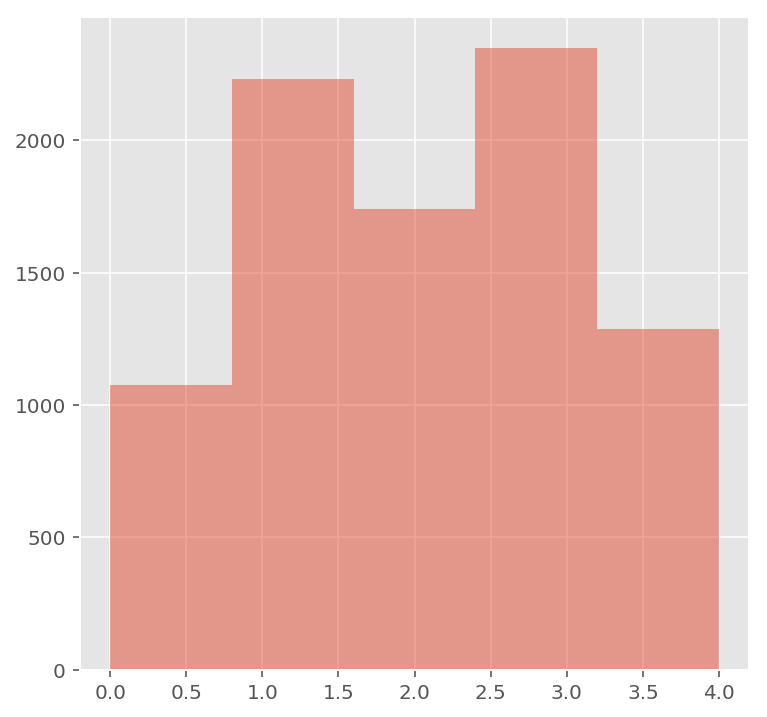

In [67]:
# Sentiment value 2 has drastically gone down after filtering 

hist(df_filtered.sentiment, bins = 5, alpha = 0.5);
xticks = range(5);
print(df_filtered.sentiment.value_counts(1));

# Baseline Machine Learning Model

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

from nltk.stem import WordNetLemmatizer, PorterStemmer


In [69]:
# lemmatizer = WordNetLemmatizer()
# w_tokenizer = nltk.tokenize.WhitespaceTokenizer()


# def lemmatize_text(text):
#     return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

# df_filtered['text_lemmatized'] = df_filtered.phrase.apply(df_filtered.phrase)

In [70]:
# vectorizers = [CountVectorizer(stop_words = 'english'), TfidfVectorizer(stop_words = 'english')]

# for vectorizer in vectorizers:
    
#     features = vectorizer.fit_transform(df_filtered.phrase).toarray()
#     labels = df_filtered.sentiment

#     models = []
#     models.append(('LR',LogisticRegression()))
#     models.append(('mnb', MultinomialNB()))
#     models.append(('RF', RandomForestClassifier()))

#     results = [] 
#     names = []

#     for name, model in models:
#         kfold =KFold(n_splits = 10)
#         cv_results = cross_val_score(model, features, labels, scoring = 'accuracy')
#         results.append(cv_results)
#         names.append(name)
#         msg = "{} -{}: {}".format(vectorizer.__class__.__name__, name, cv_results.mean())
#         print(msg)
    
#     print('_______________________________')


# Sentiment Analysis with Vader

In [71]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
analyzer = SentimentIntensityAnalyzer()

In [72]:
snt = analyzer.polarity_scores(df_filtered.phrase[0])

In [73]:
print(df_filtered.phrase[0], snt)

A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story . {'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.5579}


In [74]:
ex = analyzer.polarity_scores('This is a love story')
ex2 = analyzer.polarity_scores('I love this story')

In [75]:
print(ex, ex2)

{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.6369} {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}


In [76]:
df_filtered.head(3)

,phraseid,sentenceid,phrase,sentiment,review_word_length
0,1,1,A series of escapades demonstrating the adage ...,1,37
63,64,2,"This quiet , introspective and entertaining in...",4,11
81,82,3,"Even fans of Ismail Merchant's work , I suspec...",1,21


#### Adding sentiment analysis with respective phrases that are vectorized. Training ML models with the merged values 

In [77]:
polarity_dic = {}

for sentence in df_filtered.phrase:
    vader_sentiment = analyzer.polarity_scores(sentence).items()
    sent_list = []
    for sentiment in vader_sentiment:
        sent_list.append(sentiment[1])
        
    polarity_dic[sentence] = sent_list

In [78]:
polarity_df = pd.DataFrame(list(polarity_dic.values()), df_filtered.reset_index()['index']).rename(columns = {0:'neg', 1:'neu',2:'pos', 3:'compound'})

In [79]:
df_filtered_polarity = df_filtered.join(polarity_df)

In [80]:
vectorizer = TfidfVectorizer()

hstack([vectorizer.transform(df_filtered.NNP)])

df_filtered_polarity




AttributeError: 'DataFrame' object has no attribute 'NNP'

#### Results only slightly better. Also, removing stopwords worsens the performance

In [ ]:
# vectorizers = [CountVectorizer(), TfidfVectorizer(
#     sublinear_tf=True,
#     strip_accents='unicode',
#     analyzer='word',
#     token_pattern=r'\w{1,}',
#     stop_words='english',
#     ngram_range=(1, 3),
#     max_features=18000)]

# for vectorizer in vectorizers:
    
#     features = vectorizer.fit_transform(df_filtered_polarity.phrase).toarray()
#     features_added = pd.DataFrame(features).join(df_filtered_polarity.reset_index()['neg, neu, pos, compound'.split(', ')])
#     labels = df_filtered.sentiment

#     models = []
#     models.append(('LR',LogisticRegression()))
# #     models.append(('mnb', MultinomialNB()))
#     models.append(('RF', RandomForestClassifier()))

#     results = []
#     names = []

#     for name, model in models:
#         kfold =KFold(n_splits = 10)
#         cv_results = cross_val_score(model, features_added, labels, scoring = 'accuracy')
#         results.append(cv_results)
#         names.append(name)
#         msg = "{} -{}: {}".format(vectorizer.__class__.__name__, name, cv_results.mean())
#         print(msg)
    
#     print('_______________________________')


In [ ]:
# vectorizers = [CountVectorizer(), TfidfVectorizer(
#     sublinear_tf=True,
#     strip_accents='unicode',
#     analyzer='word',
#     token_pattern=r'\w{1,}',
#     ngram_range=(1, 3),
#     max_features=18000)]

# for vectorizer in vectorizers:
    
#     features = vectorizer.fit_transform(df_filtered_polarity.phrase).toarray()
#     features_added = pd.DataFrame(features).join(df_filtered_polarity.reset_index()['neg, neu, pos, compound'.split(', ')])
#     labels = df_filtered.sentiment

#     models = []
#     models.append(('LR',LogisticRegression()))
# #     models.append(('mnb', MultinomialNB()))
#     models.append(('RF', RandomForestClassifier()))

#     results = []
#     names = []

#     for name, model in models:
#         kfold =KFold(n_splits = 10)
#         cv_results = cross_val_score(model, features_added, labels, scoring = 'accuracy')
#         results.append(cv_results)
#         names.append(name)
#         msg = "{} -{}: {}".format(vectorizer.__class__.__name__, name, cv_results.mean())
#         print(msg)
    
#     print('_______________________________')


In [ ]:
# from nltk import word_tokenize, pos_tag, ne_chunk
# from nltk.tag import StanfordNERTagger

# st = StanfordNERTagger('/usr/share/stanford-ner/classifiers/english.all.3class.distsim.crf.ser.gz','/usr/share/stanford-ner/stanford-ner.jar', encoding='utf-8')

# tagged = pos_tag(df_filtered.phrase[407].split())

# ne_chunk(tagged, binary = True)


# Filtering Named Entity Recognition / Proper Nouns

In [ ]:
from nltk import ngrams
from nltk.tokenize import RegexpTokenizer
from collections import Counter
import re


In [ ]:
# sentence = df_filtered.phrase[198]

# tagged_sent = pos_tag(sentence.split())
# print(tagged_sent)


# propernouns = [word for word,pos in tagged_sent if pos == 'NNP']


In [ ]:
df_filtered = df.iloc[list(unique_phrase_dic.keys())]

In [ ]:
# for i in df_filtered.index:
#     sentence = df_filtered.phrase[i].replace("'s","'S").split()
#     for index, word in enumerate(sentence):
#         prev_index = index - 1
#         next_index = index + 1

#         if sentence[index].islower():
#             if sentence[prev_index].istitle() and sentence[next_index].istitle() and next_index < len(sentence) -1:  
#                 sentence[index] = sentence[index].title() 


In [ ]:
# Getting rid of white space existing before commas, periods, apostrophes.
# Correctly writing "doesn't" and "don't"

df_filtered.phrase = df_filtered.phrase.apply(lambda x: re.sub(r"\b\s+'\b", r"'", x))
df_filtered.phrase = df_filtered.phrase.str.replace("-LRB-", "")
df_filtered.phrase = df_filtered.phrase.str.replace("-RRB-", "")
# df_filtered.phrase = df_filtered.phrase.str.replace("do n't", "don't")
df_filtered.phrase = df_filtered.phrase.str.replace(".", "")


In [ ]:
df_filtered.phrase = df_filtered.phrase.apply(lambda x: x[0].upper() + x[1:])

In [ ]:
df_filtered

In [279]:
for i in df_filtered.index:
    if df_filtered.phrase[i][0].isalpha() == False:
        print(df_filtered.phrase[i])
        print('')

    

IndexError: string index out of range

In [267]:
k = 'haha'
k.isalpha

<function str.isalpha>

In [196]:
sentence = df_filtered.phrase[198].split()

NamedEnt = []

for index, word in enumerate(sentence):
    next_index = index + 1
    if word.istitle():
        if sentence[next_index].istitle():
            if sentence[index] not in NamedEnt:
                NamedEnt.append(sentence[index])
            if sentence[next_index] not in NamedEnt:
                NamedEnt.append(sentence[next_index])
            

In [197]:
df_filtered.phrase[198]

'Narratively , Trouble Every Day is a plodding mess .'

In [116]:
sentence = df_filtered.phrase[155984].replace("'s","'S").split()

for index, word in enumerate(sentence):
    prev_index = index - 1
    next_index = index + 1
    
    if sentence[index].islower():
        if sentence[prev_index].istitle() and sentence[next_index].istitle():
            sentence[index] = sentence[index].title() 
            

In [123]:
sentence

['...',
 'either',
 "you're",
 'willing',
 'to',
 'go',
 'with',
 'this',
 'claustrophobic',
 'concept',
 'or',
 "you're",
 'not',
 '.']

In [142]:
NamedEnt2 = [] 
for index, word in enumerate(sentence):
    next_index = index + 1
    if word.istitle():
        if index < len(sentence) -1:
            if sentence[next_index].istitle():
                if sentence[index] not in NamedEnt2:
                    NamedEnt2.append(sentence[index])
                if sentence[next_index] not in NamedEnt2:
                    NamedEnt2.append(sentence[next_index])
         

In [143]:
NamedEnt2

[]

sent2 = []

i = 0
while i < len(sentence):
    if sentence[i] in NamedEnt2:  
        while i < len(sentence) and sentence[i] in NamedEnt2:
            i += 1
        sent2.append('NamedEntity')
    else:
        sent2.append(sentence[i])
        i += 1

In [71]:
named_sent = ' '.join(sent2)

In [72]:
analyzer.polarity_scores(named_sent)

{'neg': 0.385, 'neu': 0.615, 'pos': 0.0, 'compound': -0.3612}

In [74]:
analyzer.polarity_scores(df_filtered.phrase[198])

{'neg': 0.51, 'neu': 0.49, 'pos': 0.0, 'compound': -0.6369}

In [101]:


for i in df_filtered.index:
    sentence = df_filtered.phrase[i].replace("'s","'S").split()
    
    for index, word in enumerate(sentence):
        prev_index = index - 1
        next_index = index + 1

        if sentence[index].islower():
            if sentence[prev_index].istitle() and sentence[next_index].istitle():
                sentence[index] = sentence[index].title() 


    NamedEnt2 = [] 
    for index, word in enumerate(sentence):
        next_index = index + 1
        if word.istitle():
            if index < len(sentence) -1:
                if sentence[next_index].istitle():
                    if sentence[index] not in NamedEnt2:
                        NamedEnt2.append(sentence[index])
                    if sentence[next_index] not in NamedEnt2:
                        NamedEnt2.append(sentence[next_index])


IndexError: list index out of range

In [336]:
sentence = "Even fans of Ismail Merchant's work , I suspect , would have a hard time sitting through this one ."
words = word_tokenize(sentence)
pos_tags = pos_tag(words)
#pos_tags

In [337]:
# list(df_filtered.phrase.values)

In [288]:
sentiment_4_text = ' '.join(df_filtered[df_filtered.sentiment == 4]['NNP'].values)



In [289]:



bigrams = ngrams(sentiment_4_text.split(), 2)
trigrams = ngrams(sentiment_4_text.split(), 3)
fourgrams = ngrams(sentiment_4_text.split(), 4)
fivegrams = ngrams(sentiment_4_text.split(), 5)

In [290]:
#Trigrams demonstrate that stopwords carry strong signal

Counter(fourgrams).most_common(10)



[(('one', 'of', 'the', 'best'), 8),
 (('is', 'one', 'of', 'the'), 8),
 (('one', 'of', 'the', 'most'), 7),
 (('One', 'of', 'the', 'most'), 6),
 (('One', 'of', 'the', 'best'), 6),
 (('one', 'of', 'the', "year's"), 5),
 (('of', 'the', "year's", 'most'), 3),
 (('the', 'best', 'films', 'of'), 3),
 (('best', 'films', 'of', 'the'), 3),
 (('films', 'of', 'the', 'year.'), 3)]

In [291]:
fourgram_list = []

for i in range(5):
    sentiment = ' '.join(df_filtered[df_filtered.sentiment == i]['phrase'].values)
    fourgram = ngrams(sentiment.split(), 4)
    most_common_fourgrams = Counter(fourgram).most_common(10)
    fourgram_list.append([list(i[0]) for i in most_common_fourgrams])



In [292]:
for i in fourgram_list:
    for j in i:
        print(' '.join(j))

It's hard to imagine
one of the worst
One of the most
I'm not sure which
the worst kind of
as if it were
This is the kind
is the kind of
the kind of movie
the fact that the
it wants to be
is the kind of
the kind of movie
Queen of the Damned
to the level of
whether it wants to
wants to be a
like the work of
were it not for
The script is a
is one of those
much as it is
from start to finish.
It may not be
in a film that
you might want to
but neither is it
in the right place
one of the most
movie equivalent of a
as one of the
one of the most
but it is a
My Big Fat Greek
The Lady and the
Lady and the Duke
the film is a
in the face of
Real Women Have Curves
Big Fat Greek Wedding
one of the best
is one of the
one of the most
One of the most
One of the best
one of the year's
of the year's most
the best films of
best films of the
films of the year.


In [152]:
lemma  = WordNetLemmatizer()
porter = PorterStemmer()

def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [lemma.lemmatize(token) for token in tokens]
    return ' '.join(stemmed_tokens)

df_filtered_polarity['phrase_lemmatized'] = df_filtered_polarity.phrase.apply(stem_sentences)



In [42]:

# for i in range(5):
#     sentiment_text = ''.join(df_filtered[df_filtered.sentiment == i]['phrase'].values)

#     tokenizer = RegexpTokenizer(r'\w+')

#     sentiment_text_filtered = ' '.join(tokenizer.tokenize(sentiment_text))

#     trigrams = ngrams(sentiment_4_text_filtered.split(), 3)
    


# Character vectorizer

In [84]:
x_train, x_test, y_train, y_test = train_test_split(df_filtered.phrase, df_filtered.sentiment, test_size = 0.3)

In [85]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 3),
    max_features=18000)
word_vectorizer.fit(df_filtered.phrase)
train_word_features = word_vectorizer.transform(x_train)
test_word_features = word_vectorizer.transform(x_test)

In [86]:
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    ngram_range=(1, 7),
    max_features=60000)
char_vectorizer.fit(df_filtered.phrase)
train_char_features = char_vectorizer.transform(x_train)
test_char_features = char_vectorizer.transform(x_test)


In [149]:
train_features = hstack((train_char_features.toarray(), train_word_features.toarray()))
test_features = hstack((test_char_features, test_word_features))

In [88]:
Sentiments = pd.get_dummies(train.Sentiment, drop_first = True)

In [89]:
Sentiments.iloc[:,0].values

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [181]:
# predictions_chars = []

# submission_chars = pd.DataFrame.from_dict({'phraseid': test['PhraseId']})

# for i in range(4):
#     train_target = Sentiments.iloc[:,i].values
# #     train_target = Sentiments[i].values
#     classifier = LogisticRegression(C=2.6, solver='sag')
#     classifier.fit(train_features, train_target)
#     submission_chars[str(i)] = classifier.predict_proba(test_char_features)[:, 1]

# Filtering 

In [119]:
# tagged=nltk.pos_tag(words)

# namedEnt=nltk.ne_chunk(tagged)

phrase = df_filtered.phrase[81]
words = word_tokenize(phrase)
tagged = nltk.pos_tag(words)

In [123]:
[i for i in tagged if i[1] == 'NN' or i[1] == 'NNS' or i[1] == 'VBZ' or i [1] == 'ADJP' or i[1] == 'JJ' or i[1] == 'VBG']

[('fans', 'NNS'),
 ('work', 'NN'),
 ('hard', 'JJ'),
 ('time', 'NN'),
 ('sitting', 'VBG')]

In [162]:
def cleanse():
    k = []
    
    for i in df_filtered.index:
        phrase = df_filtered.phrase[0]
        words = word_tokenize(phrase)
        tagged = nltk.pos_tag(words)
        remaining_tuple = [i for i in tagged if i[1] == 'NN' or i[1] == 'NNS' or i[1] == 'VBZ' or i [1] == 'ADJP' or i[1] == 'JJ' or i[1] == 'VBG']
        remaining_words = [i[0] for i in remaining_tuple]
        join_words = ' '.join(remaining_words)
        k.append(join_words)
        df_pos_tag = pd.DataFrame(np.array(l))
        return df_pos_tag

    
    

In [164]:
# df_filtered.phrase.apply(cleanse())

In [166]:
l = []

for i in df_filtered.index:
    phrase = df_filtered.phrase[i]
    words = word_tokenize(phrase)
    tagged = nltk.pos_tag(words)
    remaining_tuple = [i for i in tagged if i[1] == 'NN' or i[1] == 'NNS' or i[1] == 'VBZ' or i [1] == 'ADJP' or i[1] == 'JJ' or i[1] == 'VBG']
    remaining_words = [i[0] for i in remaining_tuple]
    join_words = ' '.join(remaining_words)
    k.append(join_words)
    df_pos_tag = pd.DataFrame(np.array(l))




In [43]:
df_pos_tag

NameError: name 'df_pos_tag' is not defined

In [158]:
pd.DataFrame(np.array(k))

,0
0,series escapades demonstrating adage is good g...
1,quiet introspective entertaining independent i...
2,fans work hard time sitting
3,thrilling combination ethnography intrigue bet...
4,Aggressive self-glorification manipulative whi...
5,comedy-drama epic proportions sincere performa...
6,Trouble is plodding mess
7,Importance thick wit plays reading Quotations
8,does much
9,same reason


# Keras

In [173]:
from nltk import FreqDist
entire_text = ' '.join(df_filtered.phrase.values)

remove = ".,"
table = str.maketrans("","",remove)
entire_text_filtered = entire_text.translate(table)
entire_text_filtered

all_words = word_tokenize(entire_text_filtered)

dist = FreqDist(all_words)

In [178]:
max_features = len(dist)
batch_size = 128
epochs = 3
num_classes=5

In [189]:
from keras.preprocessing import sequence,text
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense,Dropout,Embedding,LSTM,Conv1D,GlobalMaxPooling1D,Flatten,MaxPooling1D,GRU,SpatialDropout1D,Bidirectional
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [201]:
model=Sequential()

model.add(Embedding(max_features,100,mask_zero=True))
model.add(LSTM(64,dropout=0.4, recurrent_dropout=0.4,return_sequences=True))
model.add(LSTM(32,dropout=0.5, recurrent_dropout=0.5,return_sequences=False))
model.add(Dense(num_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 100)         1819200   
_________________________________________________________________
lstm_21 (LSTM)               (None, None, 64)          42240     
_________________________________________________________________
lstm_22 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 165       
Total params: 1,874,021
Trainable params: 1,874,021
Non-trainable params: 0
_________________________________________________________________


In [194]:
features = vectorizer.fit_transform(df_filtered_polarity.phrase).toarray()
features_added = pd.DataFrame(features).join(df_filtered_polarity.reset_index()['neg, neu, pos, compound'.split(', ')])
labels = df_filtered.sentiment

In [207]:
x_train, x_test, y_train, y_test = train_test_split(features_added, pd.get_dummies(labels), test_size = 0.3)

In [ ]:
model.fit(x_train, y_train,epochs=epochs, batch_size=batch_size,verbose=1)

Epoch 1/3


In [204]:
labels.shape


(8682,)

In [206]:
pd.get_dummies(labels)

,0,1,2,3,4
0,0,1,0,0,0
63,0,0,0,0,1
81,0,1,0,0,0
116,0,0,0,1,0
156,0,1,0,0,0
166,0,0,0,0,1
198,0,1,0,0,0
213,0,0,0,1,0
247,0,1,0,0,0
259,0,1,0,0,0
